In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

### Data Aquisition

In [ ]:
data = pd.read_csv("./iris.csv")

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print("Dimension of dataset:", data.shape)
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])

Dimension of dataset: (150, 5)
Number of rows in the dataset: 150
Number of columns in the dataset: 5


In [ ]:
# printing attributes (columns) name
print("Column Names:",data.columns.values)

Column Names: ['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']


### EDA

In [ ]:
# Showing datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


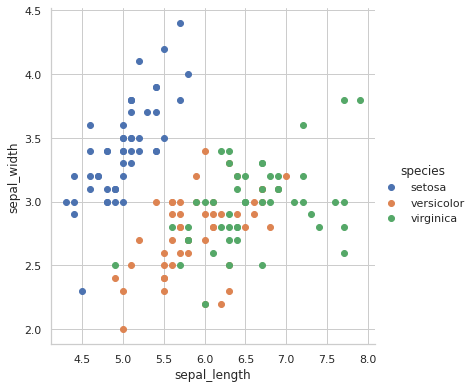

In [ ]:

# 2-D Scatter plot.
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(data, hue="species", size=5.5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();


Observation(s):

Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
Seperating Versicolor from Viginica is much harder as they have considerable overlap.

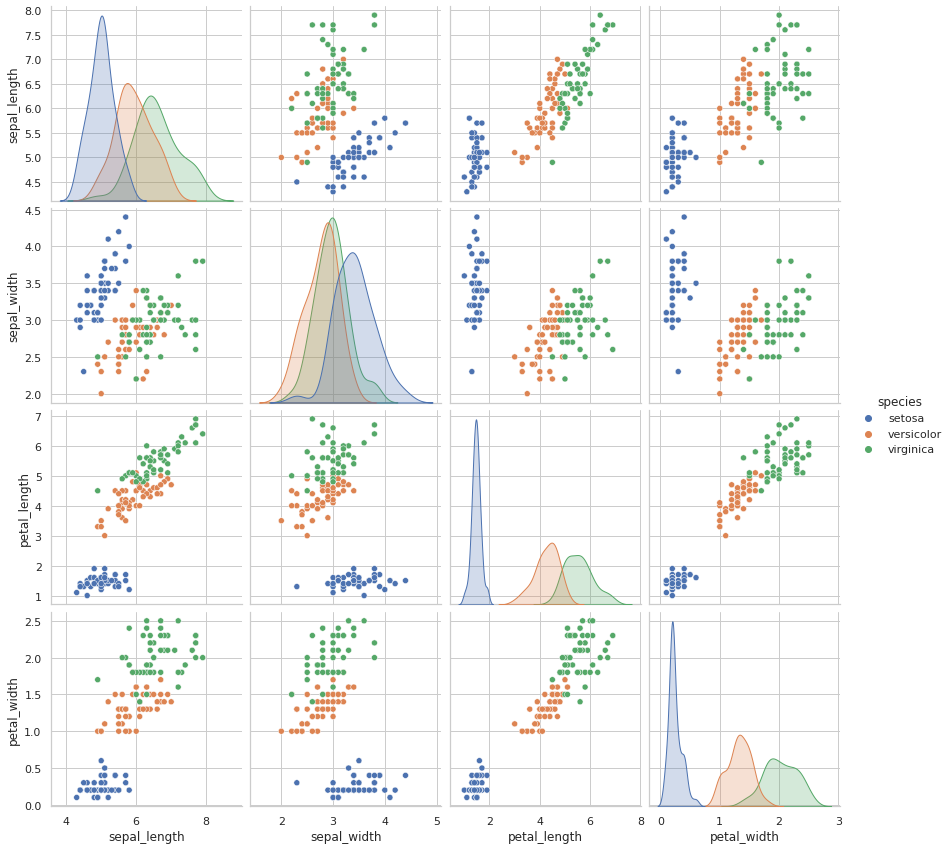

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="species", size=3);
plt.show()

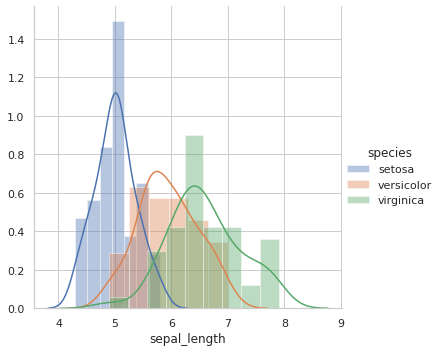

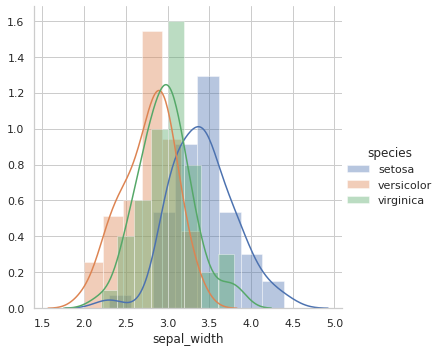

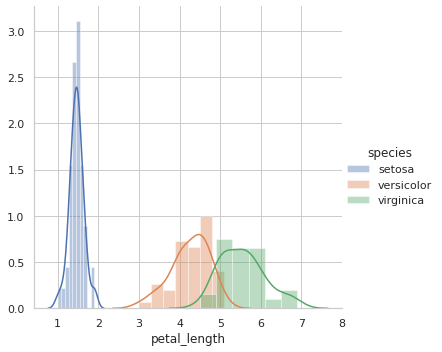

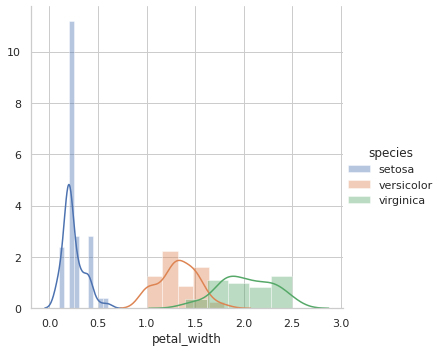

In [ ]:
for name in data.columns.values[:-1]:
    sns.FacetGrid(data, hue="species", size=5).map(sns.distplot, name).add_legend()
plt.show()

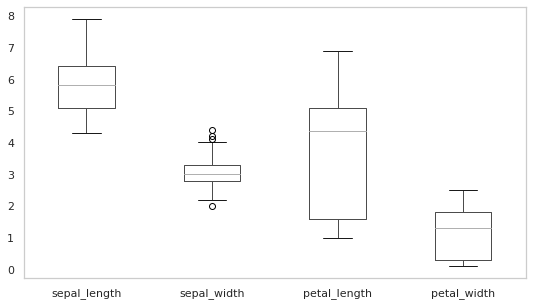

In [ ]:
data.boxplot(column= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],figsize=(9,5),grid = False)

In [ ]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# Extracting dataframe for only 'Object' datatypes
data_ct = data.select_dtypes(include='object')
data_ct.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:
# Extracting dataframe for only 'number' datatypes
data_num = data.select_dtypes(include=['float64','int64'])
data_num.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Splitting Data set into train and validation

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.30,random_state = 1)

In [ ]:

#considering only highly correlated features for training and validation
train_x = train.drop(['species'], axis = 1)
train_y = train['species']             

test_x = test.drop(['species'],axis = 1)
test_y = test['species']

print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (105, 4)
Dimension of train_y : (105,)
Dimension of test_x : (45, 4)
Dimension of test_y : (45,)


In [ ]:
#Using Decision Tree Classifier for model building by "gini"

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=2,criterion="entropy")
clf.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
pred = clf.predict(test_x)
pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [ ]:
#validation of built model
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the Decision Tree is 95.56%


## Hyperparameter tuning

In [ ]:
# Tuning Parameters using Grid search cross validation 
from sklearn.model_selection import GridSearchCV
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(1,6,1)), 
              "min_samples_leaf": list(range(1,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=1), tree_params, cv=3)
grid_tree.fit(train_x, train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
             

In [ ]:
# tree best estimator
tree_clf = grid_tree.best_estimator_
tree_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
#Print hyperparameter
print("Tuned hyperparameter: {}".format(grid_tree.best_params_)) 
print("Best score: {}".format(grid_tree.best_score_))

Tuned hyperparameter: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
Best score: 0.9523809523809524


In [ ]:
#Using best hyperparameter

DT = tree_clf.fit(train_x,train_y)
y_pred = DT.predict(test_x)
acc = accuracy_score(y_pred,test_y)
print('The accuracy of the Decision tree after hyperparameter tuning: {}%'.format(round(acc*100,2)))

The accuracy of the Decision tree after hyperparameter tuning: 95.56%


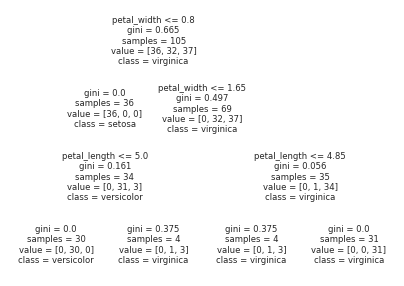

In [ ]:
#Model Visualization
from sklearn import tree
plt.figure(figsize = (7,5))
tree.plot_tree(DT,feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
               class_names= ['setosa','versicolor','virginica'],proportion = False)
plt.show()

In [ ]:

#Model visualization
from sklearn.tree.export import export_text
r = export_text(DT, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(r)

|--- petal_width <= 0.80
|   |--- class: setosa
|--- petal_width >  0.80
|   |--- petal_width <= 1.65
|   |   |--- petal_length <= 5.00
|   |   |   |--- class: versicolor
|   |   |--- petal_length >  5.00
|   |   |   |--- class: virginica
|   |--- petal_width >  1.65
|   |   |--- petal_length <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal_length >  4.85
|   |   |   |--- class: virginica



In [ ]:

#lets see the actual and predicted value 
test = test.reset_index(drop = True)
test["pred_species"] = y_pred
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pred_species
0,5.8,4.0,1.2,0.2,setosa,setosa
1,5.1,2.5,3.0,1.1,versicolor,versicolor
2,6.6,3.0,4.4,1.4,versicolor,versicolor
3,5.4,3.9,1.3,0.4,setosa,setosa
4,7.9,3.8,6.4,2.0,virginica,virginica
